In [189]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [190]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/NS- time table for Downward.csv")



In [191]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [192]:
df.head()

,Stations,Stations .1,Train times,20101,20201,20301,20401,20501,20601,20701,...,20115,20215,20315,20415,20615,20715,20815,20217,20317,20417
0,Menilik II Square T22702,NS27,Returning,5:57:00,6:12:00,6:27:00,6:42:00,7:03:00,7:18:00,7:33:00,...,20:03:00,20:18:00,20:38:00,20:58:00,21:18:00,21:38:00,21:58:00,22:16:20,22:36:20,22:59:20
1,Menilik II Square T22705,NS27,Arrival,5:57:36,6:12:36,6:27:36,6:42:36,7:03:36,7:18:36,7:33:36,...,20:03:36,20:18:36,20:38:36,20:58:36,21:18:36,21:38:36,21:58:36,22:16:56,22:36:56,22:59:56
2,Menilik II Square T22705,NS27,Departure,5:59:00,6:14:00,6:29:00,6:44:00,7:05:00,7:20:00,7:35:00,...,20:05:00,20:20:00,20:40:00,21:00:00,21:20:00,21:40:00,22:00:00,22:16:50,22:36:56,22:59:56
3,Atikilt Tera,NS26,Arrival,6:01:42,6:16:42,6:31:42,6:46:42,7:07:42,7:22:42,7:37:42,...,20:07:42,20:22:42,20:42:42,21:02:42,21:22:42,21:42:42,22:02:42,NaN,NaN,NaN
4,Atikilt Tera,NS26,Departure,6:02:12,6:17:12,6:32:12,6:47:12,7:08:12,7:23:12,7:38:12,...,20:08:12,20:23:12,20:43:12,21:03:12,21:23:12,21:43:12,22:03:12,NaN,NaN,NaN


# Perform Basic Checks on Raw Data
The basic_checks function is called to get a comprehensive summary of the raw data, including its shape, data types, and null value counts.

In [193]:
basic_checks(df)

--- Shape ---
(46, 73)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 73 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Stations     46 non-null     object
 1   Stations .1  46 non-null     object
 2   Train times  46 non-null     object
 3   20101        46 non-null     object
 4   20201        46 non-null     object
 5   20301        46 non-null     object
 6   20401        46 non-null     object
 7   20501        46 non-null     object
 8   20601        46 non-null     object
 9   20701        46 non-null     object
 10  20801        46 non-null     object
 11  20901        46 non-null     object
 12  20103        46 non-null     object
 13  20203        46 non-null     object
 14  20303        46 non-null     object
 15  20403        46 non-null     object
 16  20503        46 non-null     object
 17  20603        46 non-null     object
 18  20703        46 non-null     object

# Drop Columns with High NaN Percentage
Columns with a significant amount of missing data (over 30%) are removed from the DataFrame.

In [194]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.30)


Dropping columns with > 30.0% NaNs: ['20217', '20317', '20417']


# Rename Columns
Key columns are renamed to be more intuitive, such as changing

In [195]:
# raname columns for better readability
df = df.rename(columns={'Stations .1': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



# Reshape Data from Wide to Long Format
The melt_and_pivot_train_schedule function is used to convert the data from a wide format to a long format, making it easier to analyze time-based events.

In [196]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)

c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


# Perform Basic Checks on processed Data
The basic_checks function is called to get a comprehensive summary of the processed data, including its shape, data types, and null value counts.

In [197]:
basic_checks(df_pivot)

--- Shape ---
(1601, 5)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Stations    1601 non-null   object        
 1   station_id  1601 non-null   object        
 2   train_id    1601 non-null   object        
 3   Arrival     1541 non-null   datetime64[ns]
 4   Departure   1534 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 62.7+ KB

--- Null Values ---
arrival_departure
Stations       0
station_id     0
train_id       0
Arrival       60
Departure     67
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1541   
mean               2025-08-05 14:13:57.988319232   
min                          2025-08-05 05:57:00   
25%                          2025-08-05 10:12:40   
50%                          20

In [198]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [199]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [200]:
basic_checks(df_pivot)

--- Shape ---
(1601, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    1601 non-null   object         
 1   station_id  1601 non-null   object         
 2   train_id    1601 non-null   object         
 3   Arrival     1601 non-null   datetime64[ns] 
 4   Departure   1601 non-null   datetime64[ns] 
 5   Dwell Time  1601 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 75.2+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1601   
mean               2025-08-05 14:04:37.360036352   
min                          2025-08-05 05:57:00

# Compute Station Arrival Gap Statistics
The compute_station_gap_stats function is used to calculate metrics related to the time intervals between train arrivals at each station.

In [201]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
                    Stations    Avg_Gap  Min_Gap  Max_Gap   Gap_Std
11  Menilik II Square T22702   7.150656      0.0     21.0  7.443310
8              Kality T20623   7.977005      0.0     21.0  7.563769
0                      Abnet  14.560606      6.0     21.0  3.059054
1                        Abo  14.560606      6.0     21.0  3.059054
4               Autobus Tera  14.560606      6.0     21.0  3.059054
5              Darmar T22010  14.560606      6.0     21.0  3.059054
2                 Adey Ababa  14.560606      6.0     21.0  3.059054
3             Atikilt Tera    14.560606      6.0     21.0  3.059054
7              Kality T20619  14.560606      6.0     21.0  3.059054
6              Gojam Berenda  14.560606      6.0     21.0  3.059054
9                     Lancha  14.560606      6.0     21.0  3.059054
10                    Leghar  14.560606      6.0     21.0  3.059054
12  Menilik II Square T22705  14.560606      6.0     21.0  3.059054
13               Mes

Filter Out Station first and last stations  because of missing arrival and departure date or high dwell time 

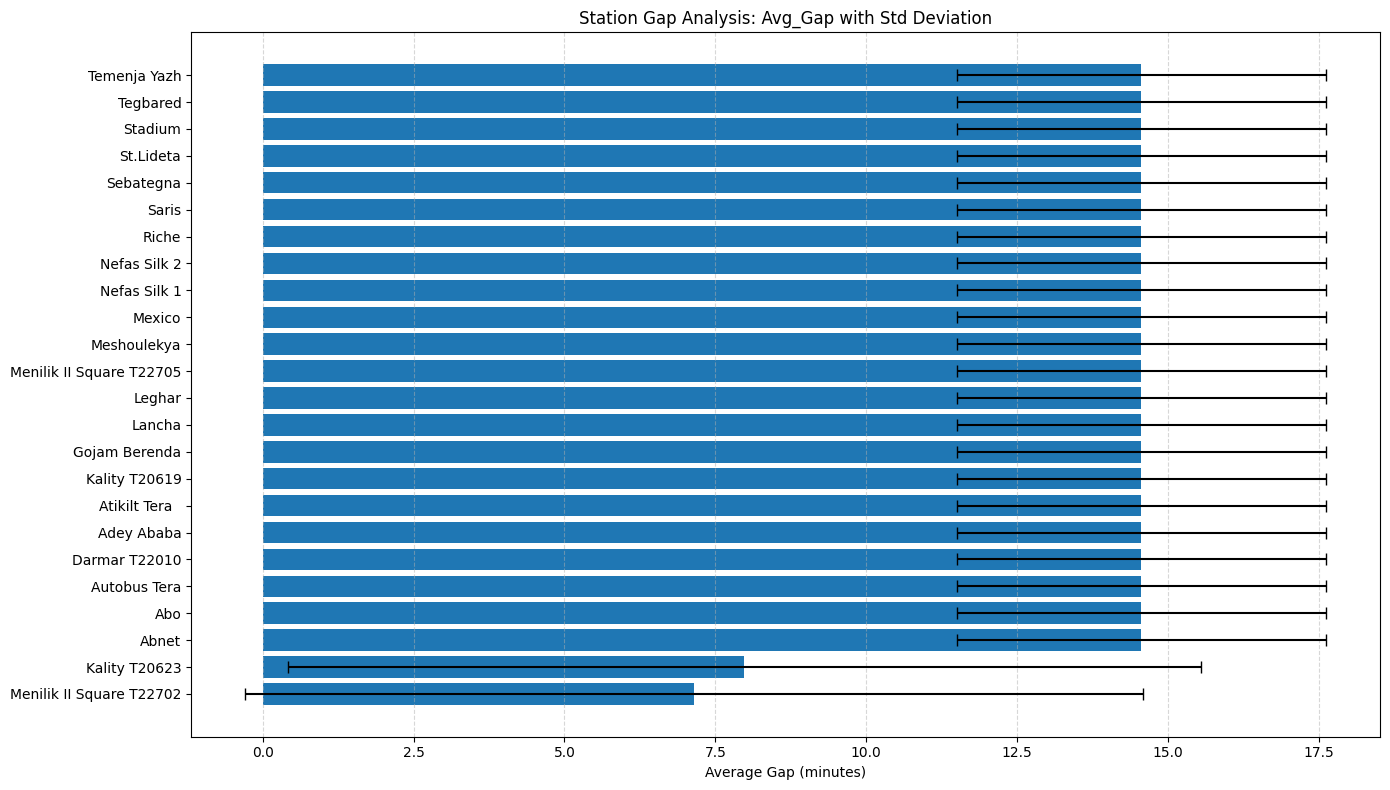

In [210]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

# Sort by Avg_Gap for better visualization
df_sorted = station_stats.sort_values("Avg_Gap")

plot_utils.plot_dwell_time_distribution(df_sorted)


In [202]:
df_pivot = df_pivot [df_pivot ['station_id'] != 'NS6']
df_pivot = df_pivot [df_pivot ['station_id'] != 'NS27']


# Visualize Data Statistics
The plot_utils module is used to create several visualizations of the processed NS downward line data, including plots of average arrival gaps and dwell times.

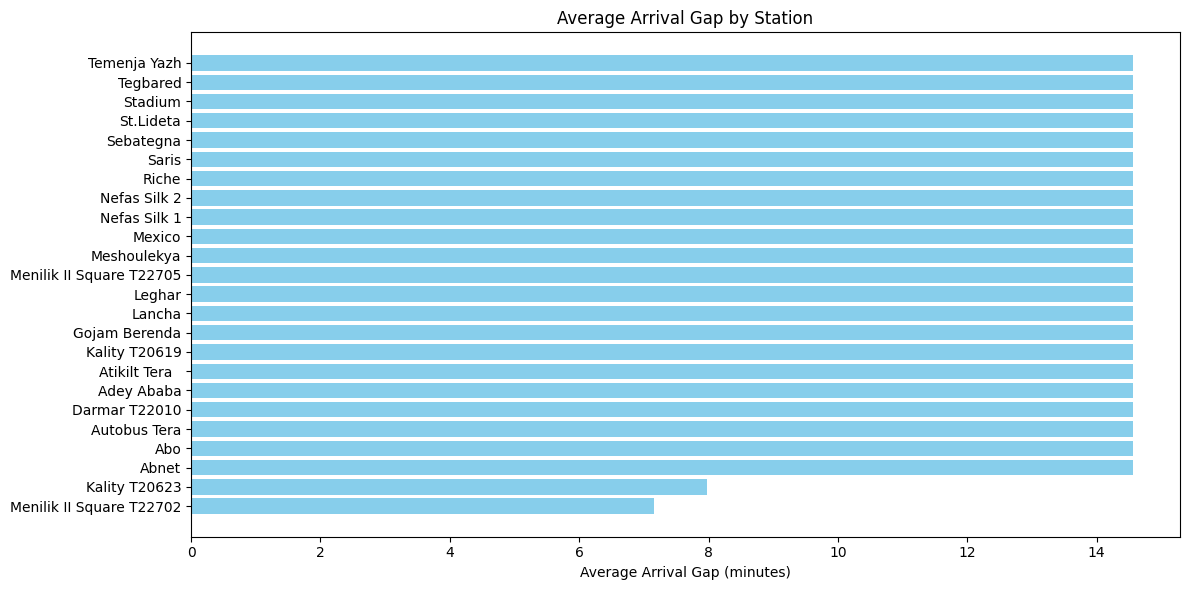

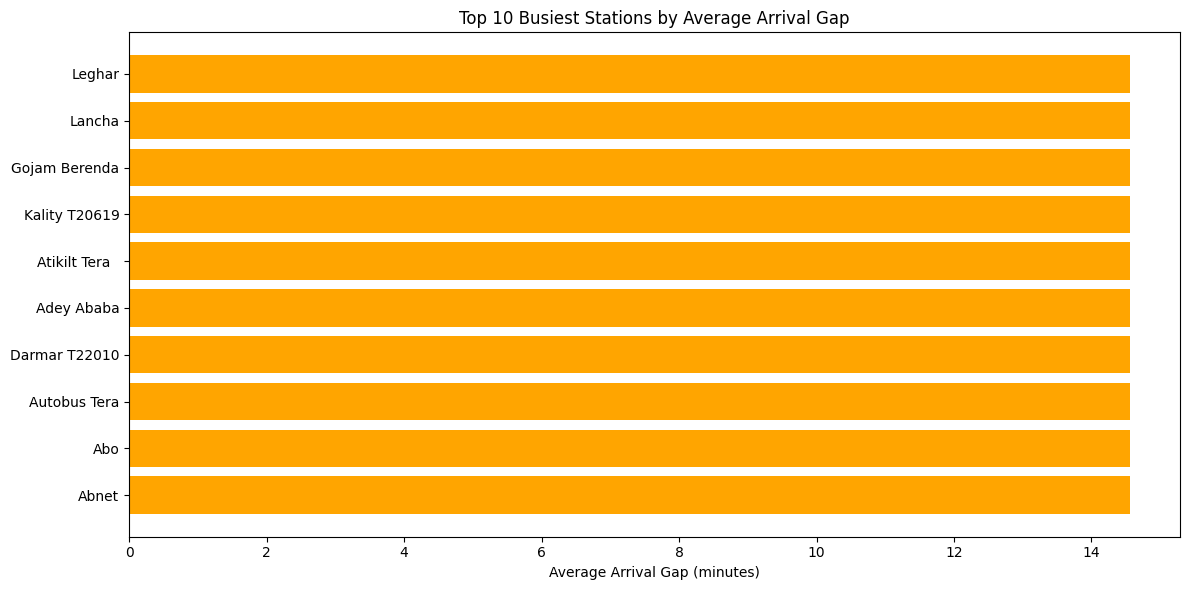

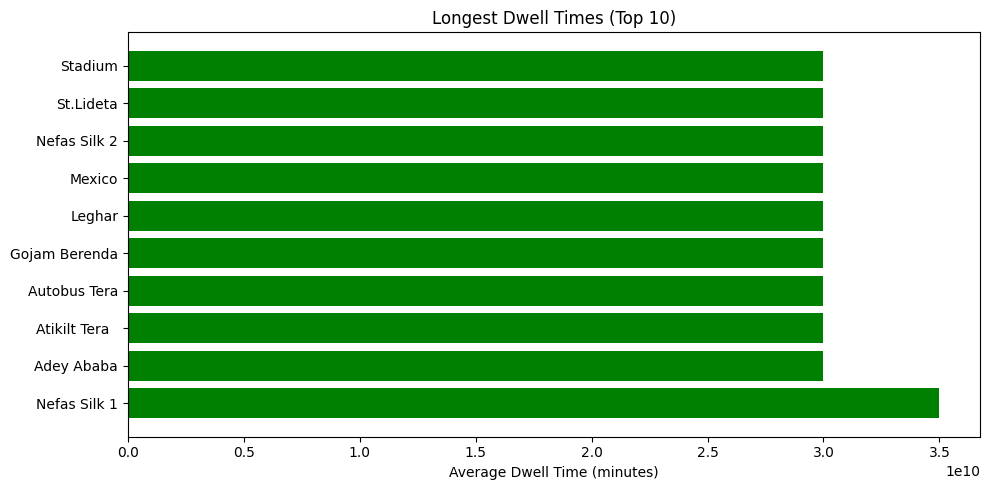

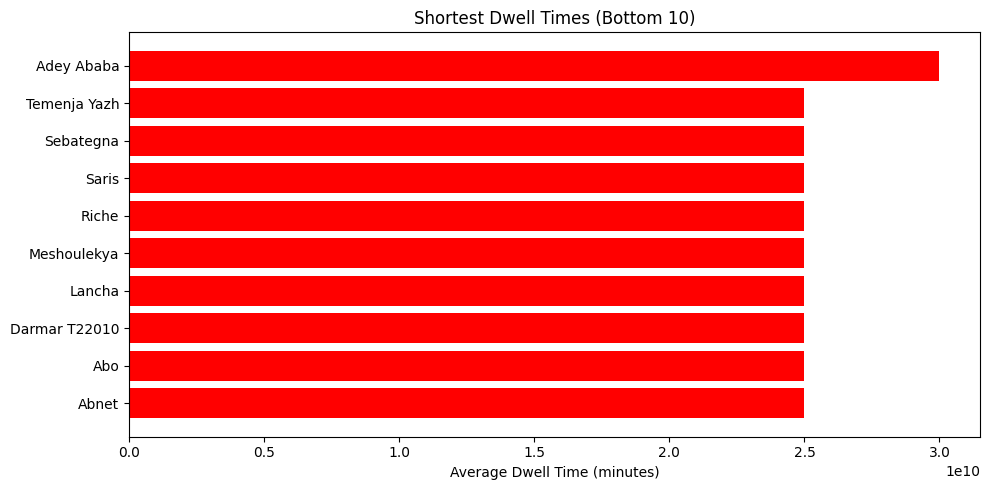

In [203]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [204]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

# Calculate and Display Average Dwell Time
A new DataFrame is created to show the average dwell time for each station. It's calculated by grouping df_pivot by 'station_id' and finding the mean of 'Dwell Time'.

In [205]:
# a new dataframe with the stations,station_id and the average dwell time
avg_dwell_time = df_pivot.groupby('station_id')['Dwell Time'].mean().reset_index()
avg_dwell_time = avg_dwell_time.rename(columns={'Dwell Time': 'Average Dwell Time'})
avg_dwell_time.head(50)

,station_id,Average Dwell Time
0,NS10,0 days 00:00:35
1,NS11,0 days 00:00:30
2,NS12,0 days 00:00:25
3,NS13,0 days 00:00:25
4,NS14,0 days 00:00:25
5,NS15,0 days 00:00:25
6,NS16,0 days 00:00:30
7,NS17,0 days 00:00:30
8,NS18,0 days 00:00:30
9,NS19,0 days 00:00:30


# check for outliers on Dwell time

In [206]:
print(df_pivot[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10)][["Stations","Dwell Time"]])
print(df_pivot[df_pivot['Dwell Time'] < pd.Timedelta(minutes=0)][["Stations","Dwell Time"]])


Empty DataFrame
Columns: [Stations, Dwell Time]
Index: []
Empty DataFrame
Columns: [Stations, Dwell Time]
Index: []


In [207]:
avg_dwell_time.head()

,station_id,Average Dwell Time
0,NS10,0 days 00:00:35
1,NS11,0 days 00:00:30
2,NS12,0 days 00:00:25
3,NS13,0 days 00:00:25
4,NS14,0 days 00:00:25


In [208]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/NS-time table for_processed_Downward.csv', index=False)

In [209]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')